<a href="https://colab.research.google.com/github/theresaltrinh/project_voting/blob/main/Visuals_HeatMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install mapclassify

In [2]:
! git clone https://github.com/theresaltrinh/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 227 (delta 86), reused 76 (delta 48), pack-reused 103
Receiving objects: 100% (227/227), 32.97 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
df = pd.read_csv('/content/project_voting/cleaned_voting_VA.csv')
df.head()



,Unnamed: 0,year,countyName,countyCode,candidate,party,candidatevotes,totalvotes
0,0,2000,Accomack,51001,Al Gore,Democrat,5092,11925
1,1,2000,Accomack,51001,George W. Bush,Republican,6352,11925
2,2,2000,Accomack,51001,Ralph Nader,Green,220,11925
3,3,2000,Accomack,51001,Other,Other,261,11925
4,4,2000,Albemarle,51003,Al Gore,Democrat,16255,36846


In [89]:
df = pd.read_csv('/content/project_voting/cleaned_voting_VA.csv')
df.head()

gdf = gpd.read_file('/content/drive/MyDrive/VirginiaCounty_ClippedToShoreline.shx')
gdf.head()

#adjacencies
cdf = pd.read_csv('/content/project_voting/cleaned_county_adjacencies.csv')
cdf.head()

#Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
mdf = gdf.merge(cdf,left_on='FIPS_left',right_on='CountyCode')  # merge county population and adjacency data into df
del gdf, cdf



In [91]:
print(df)

      Unnamed: 0  year countyName  countyCode          candidate        party  \
0              0  2000   Accomack       51001            Al Gore     Democrat   
1              1  2000   Accomack       51001     George W. Bush   Republican   
2              2  2000   Accomack       51001        Ralph Nader        Green   
3              3  2000   Accomack       51001              Other        Other   
4              4  2000  Albemarle       51003            Al Gore     Democrat   
...          ...   ...        ...         ...                ...          ...   
2671        2671  2020      Wythe       51197              Other        Other   
2672        2672  2020       York       51199     Donald J Trump   Republican   
2673        2673  2020       York       51199       Jo Jorgensen  Libertarian   
2674        2674  2020       York       51199  Joseph R Biden Jr     Democrat   
2675        2675  2020       York       51199              Other        Other   

      candidatevotes  total

In [66]:
print(mdf)

Empty GeoDataFrame
Columns: [STCOFIPS, GNIS, NAME, NAMELSAD, GSOURCE, LADOPT, LASTUPDATE, JURISTYPE, AREASQMI, Shape_Leng, Shape_Area, geometry, FIPS_left, Unnamed: 0, County, Population, CountyCode, District, Neighborhood1, Neighborhood2, Neighborhood3, Neighborhood4, Neighborhood5, Neighborhood6, Neighborhood7, Neighborhood8, Neighborhood9, Neighborhood10, Neighborhood11, Neighborhood12, dem_votes_2020_x_x, rep_votes_2020_x_x, vote_diff, dem_votes_2020_y, rep_votes_2020_y, dem_votes_2020, dem_votes_2020_x_y, rep_votes_2020_x_y]
Index: []

[0 rows x 38 columns]


Text(0.5, 1.0, 'VA Population Density Map')

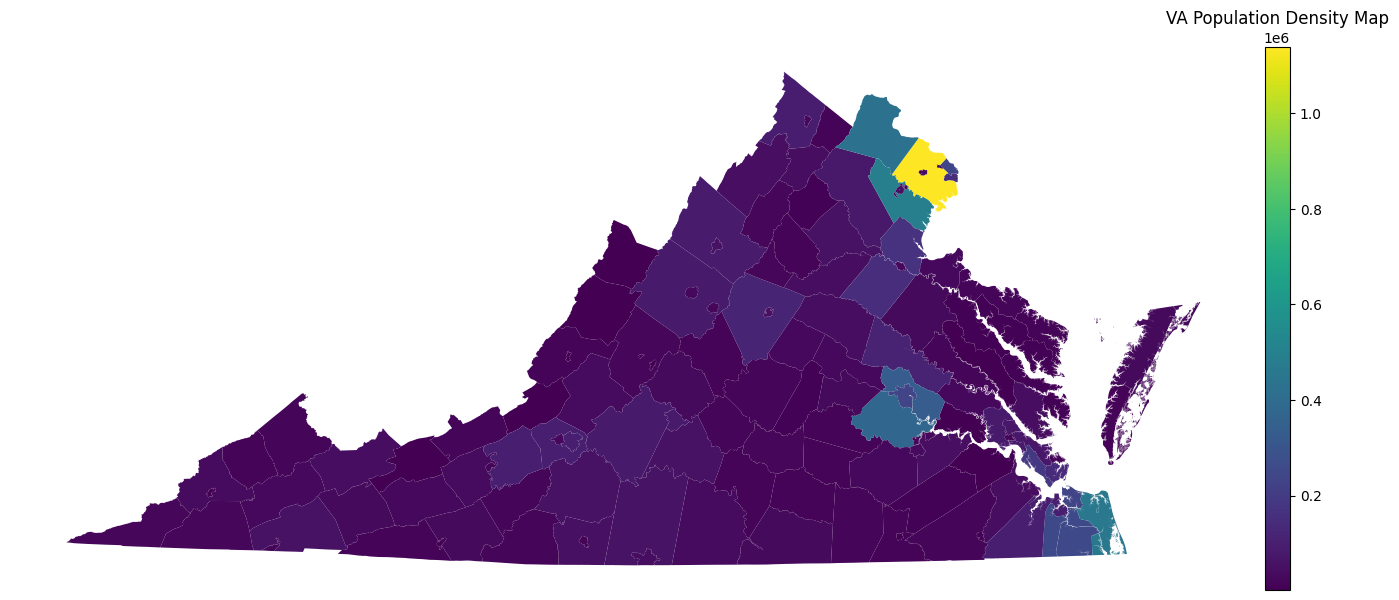

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='Population',legend=True,cax=cax)
plt.title('VA Population Density Map')

Text(0.5, 1.0, 'Districts')

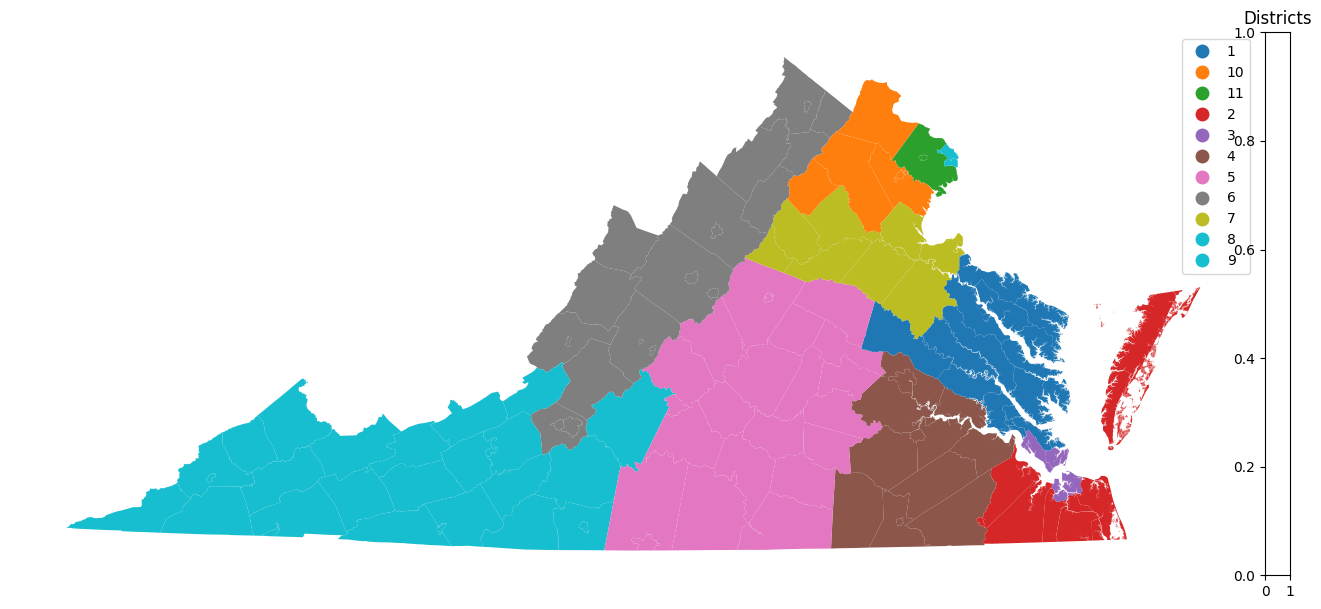

In [23]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
cdf['District'] = cdf['District'].astype(str)
mdf.plot(ax=ax,column='District',legend=True)#,cax=cax)
plt.title('Districts')

In [93]:
df20 = df.loc[ df['year']==2020,:] # Only the 2020 data

#Democrat Votes
Dvotes = df20.loc[(df20['party']=='Democrat'),:].groupby('countyCode')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020_xy')
print(Dvotes)
mdf = mdf.merge(Dvotes,left_on='FIPS_left',right_on='countyCode')

#Republican Votes
Rvotes = df20.loc[(df20['party']=='Republican'),:].groupby('countyCode')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020_xy')
mdf = mdf.merge(Rvotes,left_on='FIPS_left',right_on='countyCode')

countyCode
51001      7578
51003     42466
51005      2243
51007      2411
51009      5672
          ...  
51800     28676
51810    117393
51820      4961
51830      4790
51840      6610
Name: dem_votes_2020_xy, Length: 133, dtype: int64


Text(0.5, 1.0, 'Democratic Voter Concentration')

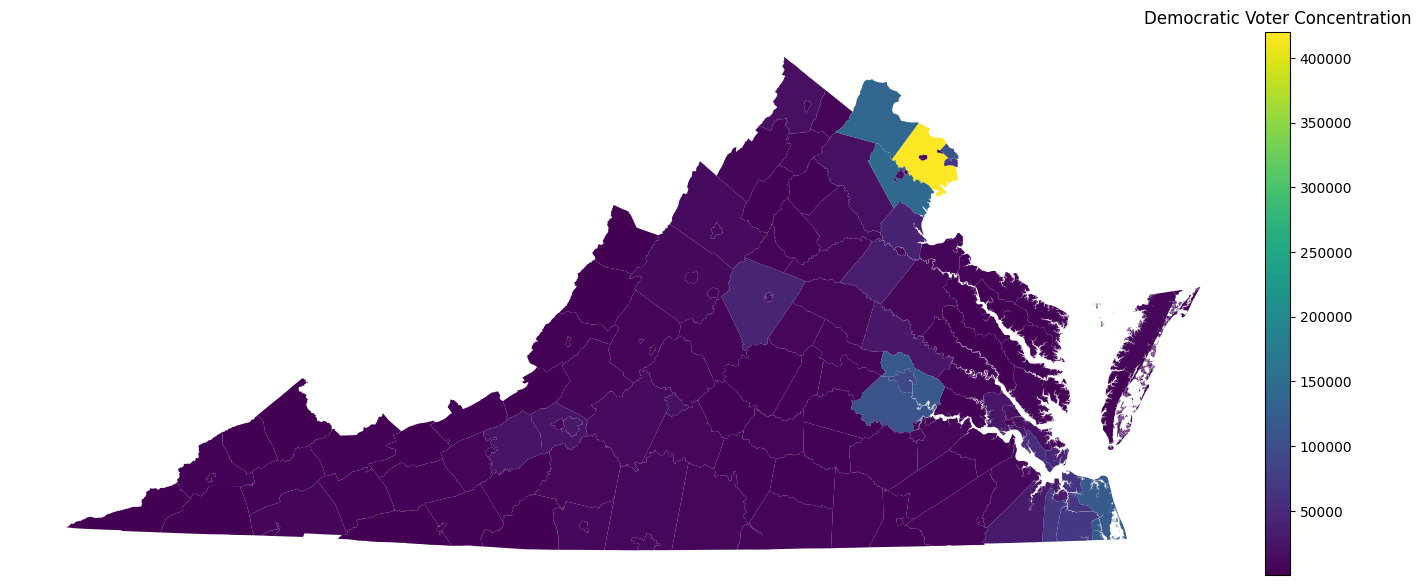

In [111]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='dem_votes_2020_xy_x',legend=True,cax=cax)
plt.title('Democratic Voter Concentration')

Text(0.5, 1.0, 'Republican Voter Concentration')

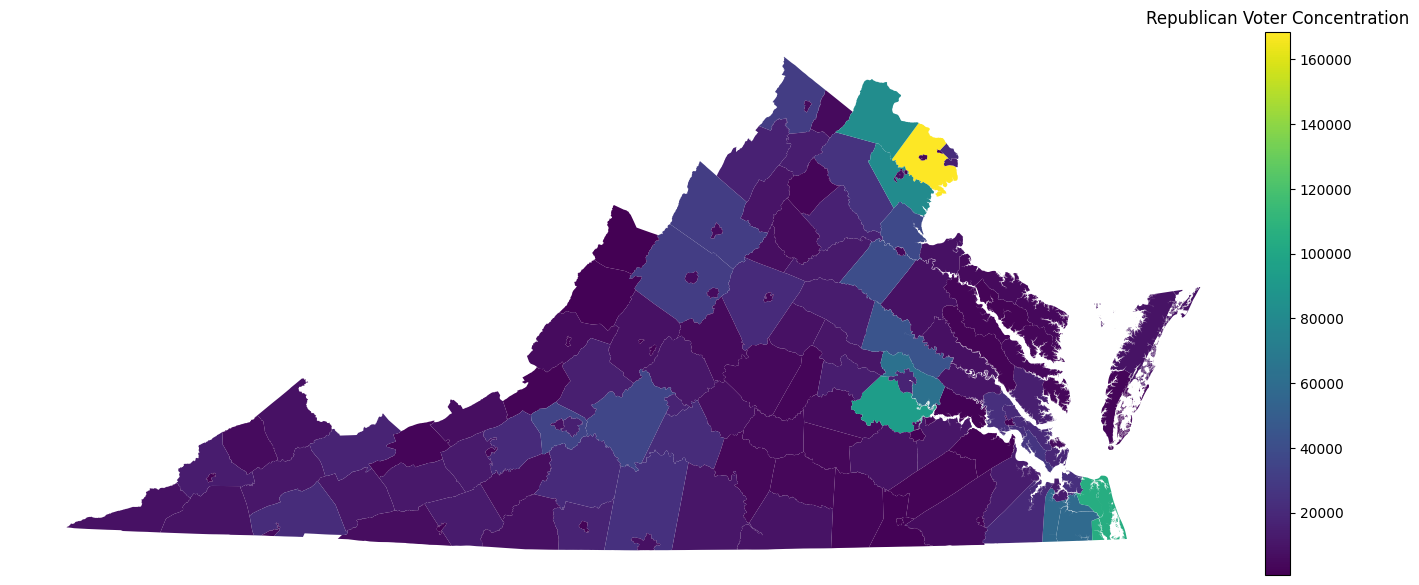

In [112]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='rep_votes_2020_xy',legend=True,cax=cax)
plt.title('Republican Voter Concentration')



Text(0.5, 1.0, 'Differences Between Votes Cast for Republican vs. Democratic Candidate ')

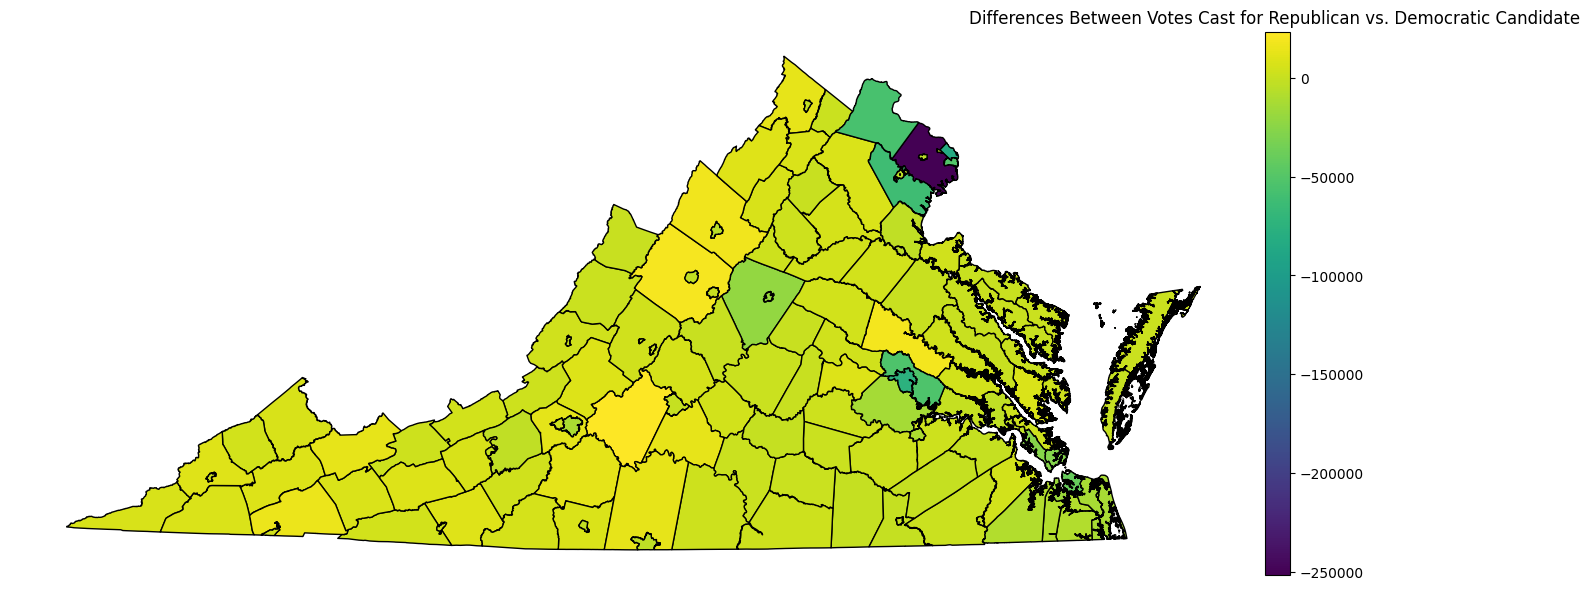

In [116]:
mdf['vote_diff'] = mdf['rep_votes_2020_xy']-mdf['dem_votes_2020_xy_x']
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='vote_diff',legend=True,cax=cax,edgecolor='k')
plt.title('Differences Between Votes Cast for Republican vs. Democratic Candidate ')

Text(0.5, 1.0, 'Normalized Difference in Partisan Voting By District')

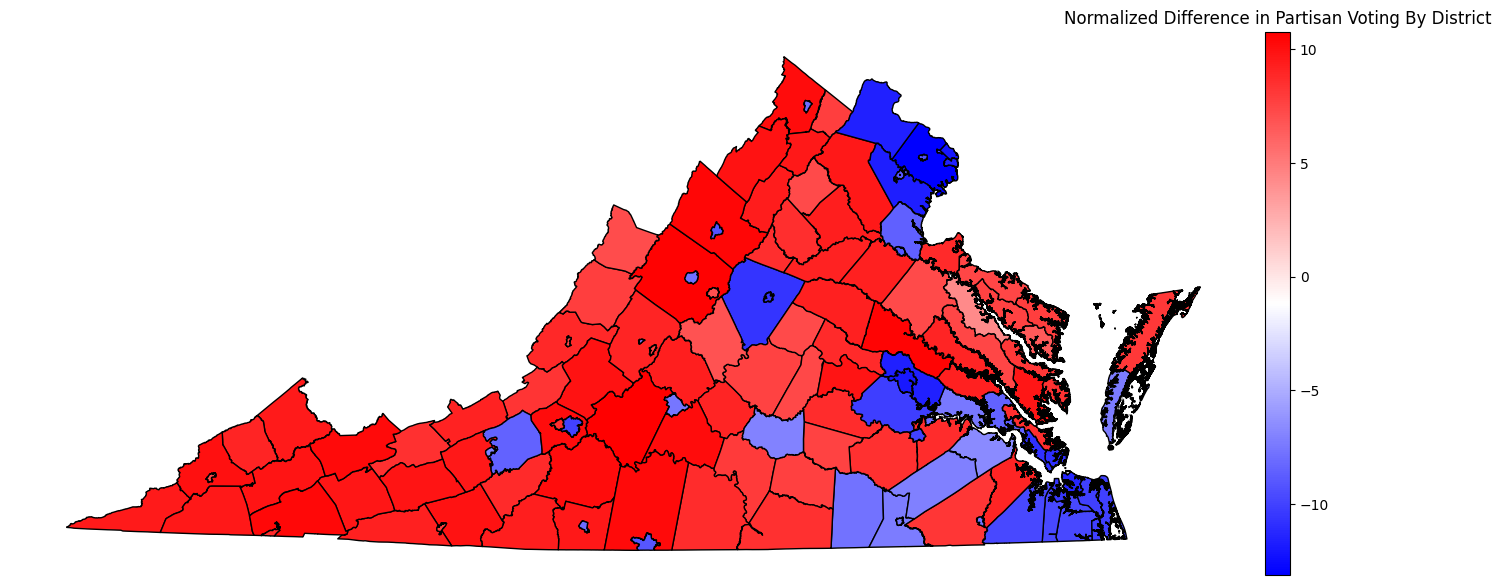

In [120]:
mdf['vote_diff_ihs'] = np.arcsinh(mdf['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')
plt.title('Normalized Difference in Partisan Voting By District')

Text(0.5, 1.0, 'Difference in Partisan Voting By District')

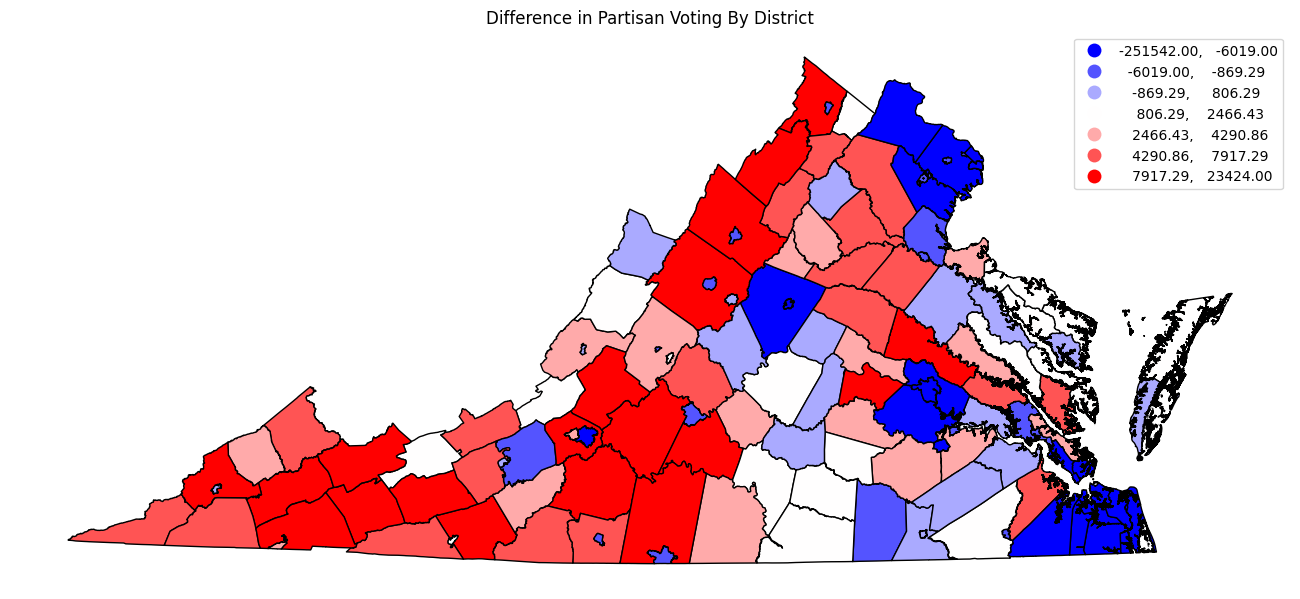

In [117]:
mdf['vote_diff'] = mdf['rep_votes_2020_xy']-mdf['dem_votes_2020_xy_x']
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='vote_diff',legend=True,cmap='bwr',edgecolor='k',scheme='Quantiles',k=7)
plt.title('Difference in Partisan Voting By District')
